In [38]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

data_dir = 'archive/A_DeviceMotion_data/A_DeviceMotion_data'
data_subjects_info = 'archive/data_subjects_info.csv'
class_names = ['dws', 'ups', 'sit', 'std', 'wlk', 'jog']
class_full_names = ['Downstairs', 'Upstairs', 'Sitting', 'Standing', 'Walking', 'Jogging']
csv_file_base = 'sub_'
num_of_user = 24
divided_num = 50

In [39]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())
print("GPU device name:", tf.test.gpu_device_name())

TensorFlow version: 2.16.1
GPU available: False
GPU device name: 


In [40]:
# data_subjects_info の内容を表示
df = pd.read_csv(data_subjects_info)
print(df)

    code  weight  height  age  gender
0      1     102     188   46       1
1      2      72     180   28       1
2      3      48     161   28       0
3      4      90     176   31       1
4      5      48     164   23       0
5      6      76     180   28       1
6      7      62     175   30       0
7      8      52     161   24       0
8      9      93     190   32       1
9     10      72     164   31       0
10    11      70     178   24       1
11    12      60     167   33       1
12    13      60     178   33       1
13    14      70     180   35       1
14    15      70     185   33       1
15    16      96     172   29       0
16    17      76     180   26       1
17    18      54     164   26       0
18    19      78     164   28       0
19    20      88     180   25       1
20    21      52     165   24       1
21    22     100     186   31       1
22    23      68     170   25       0
23    24      74     173   18       0


In [41]:
# 指定したディレクトリいかにあるのディレクトリ名を表示
dir_list = []
for root, dirs, files in os.walk(data_dir):
    for dir in dirs:
        dir_list.append(dir)
print(dir_list)


['dws_11', 'ups_12', 'wlk_7', 'std_14', 'wlk_15', 'wlk_8', 'dws_2', 'sit_13', 'jog_9', 'ups_3', 'ups_4', 'jog_16', 'dws_1', 'sit_5', 'std_6']


In [42]:
user_data = []
for i in range(1, num_of_user + 1):
    user_data.append({})
    for d in dir_list:
        # ユーザーに対応する番号のcsv を開きdf として読み込む
        file_name = data_dir + '/' + d + '/' + csv_file_base + str(i) + '.csv'
        df = pd.read_csv(file_name)
        user_data[i - 1][d] = df

In [43]:
# ユーザーごとに読み込んだデータを動作ごとに結合する
for i in range(1, num_of_user + 1):
    for class_name in class_names:
        df = pd.DataFrame()
        for d in dir_list:
            if class_name in d:
                df = pd.concat([df, user_data[i - 1][d]])

        # 一列目を削除
        df = df.iloc[:, 1:]

        # インデックスを振り直す
        df = df.reset_index(drop=True)

        user_data[i - 1][class_name] = df


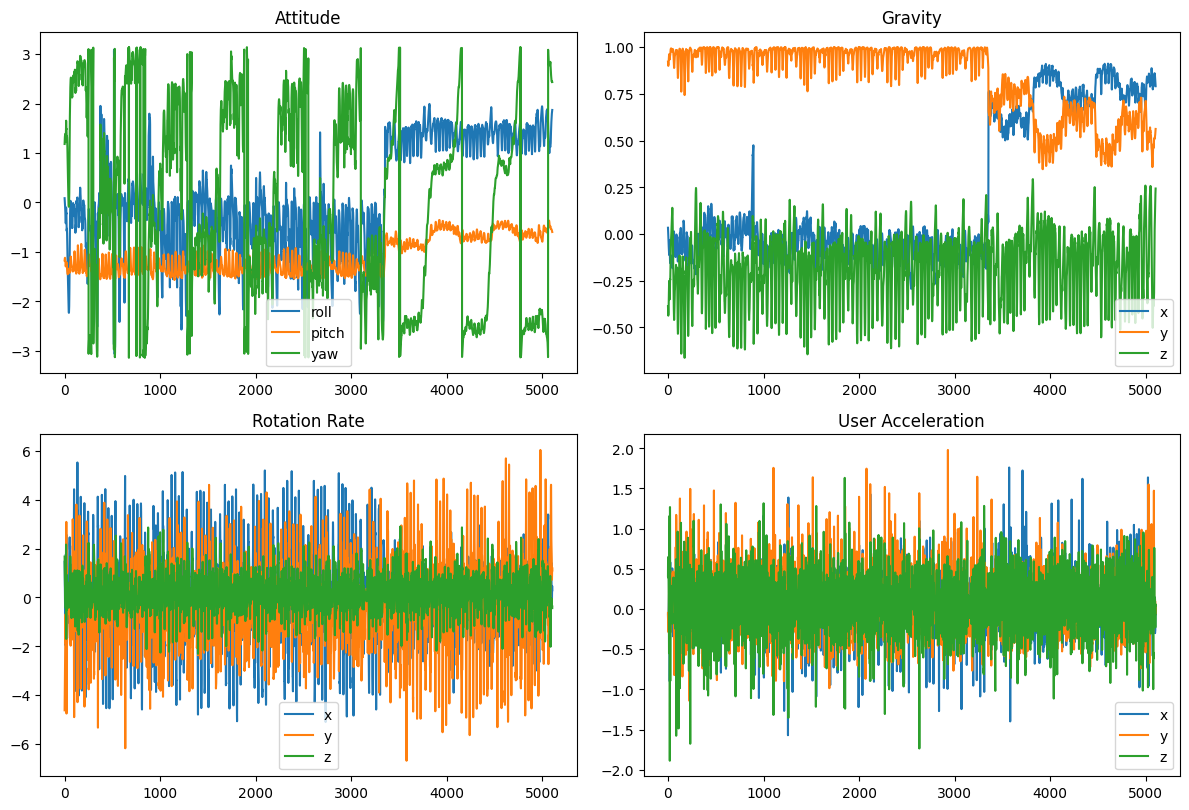

In [44]:
import matplotlib.pyplot as plt


def plot_sensor_data(df):
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    # attitude
    axs[0, 0].plot(df['attitude.roll'], label='roll')
    axs[0, 0].plot(df['attitude.pitch'], label='pitch')
    axs[0, 0].plot(df['attitude.yaw'], label='yaw')
    axs[0, 0].set_title('Attitude')
    axs[0, 0].legend()

    # gravity
    axs[0, 1].plot(df['gravity.x'], label='x')
    axs[0, 1].plot(df['gravity.y'], label='y')
    axs[0, 1].plot(df['gravity.z'], label='z')
    axs[0, 1].set_title('Gravity')
    axs[0, 1].legend()

    # rotationRate
    axs[1, 0].plot(df['rotationRate.x'], label='x')
    axs[1, 0].plot(df['rotationRate.y'], label='y')
    axs[1, 0].plot(df['rotationRate.z'], label='z')
    axs[1, 0].set_title('Rotation Rate')
    axs[1, 0].legend()

    # userAcceleration
    axs[1, 1].plot(df['userAcceleration.x'], label='x')
    axs[1, 1].plot(df['userAcceleration.y'], label='y')
    axs[1, 1].plot(df['userAcceleration.z'], label='z')
    axs[1, 1].set_title('User Acceleration')
    axs[1, 1].legend()

    # 空のサブプロットを削除
    fig.delaxes(axs[2, 0])
    fig.delaxes(axs[2, 1])

    plt.tight_layout()
    plt.show()


plot_sensor_data(user_data[0]['dws'])

In [45]:
# すべてのデータを200ずつで分割してnumpy配列で保存
user_array = []
for i in range(num_of_user):
    user_array.append({})
    for class_name in class_names:
        df = user_data[i][class_name]
        num_of_data = len(df)
        num_of_split = num_of_data // divided_num  # 整数除算を使用
        split_data = np.array_split(df.values[:num_of_split * divided_num], num_of_split)  # 200の倍数までのデータを分割
        user_array[i][class_name] = split_data

# すべてのデータが200個のデータを持つことを確認
for i in range(num_of_user):
    for class_name in class_names:
        for data in user_array[i][class_name]:
            assert len(data) == divided_num

In [46]:
# user情報を取得
user_info = pd.read_csv(data_subjects_info)

# code の列を削除して1行ずつnumpy配列に変換
user_info = user_info.drop('code', axis=1)
user_info = user_info.values
print(user_info)

[[102 188  46   1]
 [ 72 180  28   1]
 [ 48 161  28   0]
 [ 90 176  31   1]
 [ 48 164  23   0]
 [ 76 180  28   1]
 [ 62 175  30   0]
 [ 52 161  24   0]
 [ 93 190  32   1]
 [ 72 164  31   0]
 [ 70 178  24   1]
 [ 60 167  33   1]
 [ 60 178  33   1]
 [ 70 180  35   1]
 [ 70 185  33   1]
 [ 96 172  29   0]
 [ 76 180  26   1]
 [ 54 164  26   0]
 [ 78 164  28   0]
 [ 88 180  25   1]
 [ 52 165  24   1]
 [100 186  31   1]
 [ 68 170  25   0]
 [ 74 173  18   0]]


In [47]:
# データセットを作成する
# 1つのデータセットは200個のデータを持つ
# 1つのデータセットは4つの出力 (体重, 身長, 年齢, 性別) を持つ

input_x = []
output_classification = []
output_regression = []
for i in range(num_of_user):
    for class_name in class_names:
        for data in user_array[i][class_name]:
            # データは一つのnumpy配列にまとめる
            data = data.flatten()
            input_x.append(data)
            output_regression.append(user_info[i][:3])
            output_classification.append(user_info[i][3])

# データオーグメンテーション
# 入力のデータにノイズを加えたものを追加する
# ノイズの強さ
noise_scale = 0.01
for i in range(len(input_x)):
    noise = np.random.normal(0, noise_scale, input_x[i].shape)
    input_x.append(input_x[i] + noise)
    output_regression.append(output_regression[i])
    output_classification.append(output_classification[i])

# tf.data.Datasetを作成
dataset = tf.data.Dataset.from_tensor_slices(({'input_x': input_x},
                                              {'regression': output_regression,
                                               'classification': output_classification}))

# 各データをテスト用, 検証用, 学習用に分割
train_rate = 0.7
val_rate = 0.2
test_rate = 0.1

dataset_size = len(input_x)
train_size = int(train_rate * dataset_size)
val_size = int(val_rate * dataset_size)
test_size = int(test_rate * dataset_size)

train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

# データセットをシャッフルしてバッチ化
batch_size = 1000
train_dataset = train_dataset.shuffle(buffer_size=train_size).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


In [56]:
input_shape = (divided_num * 12,)  # 入力の形状に合わせて適切な値を設定してください
output_shape_regression = (3,)  # 体重、身長、年齢の3つの連続値
output_shape_classification = (1,)  # 性別の2値分類

hidden_units = 1000
l2_regularization = 0.001  # L2正則化の強度

# 入力層
inputs = keras.Input(shape=input_shape, name='input_x')

# 共通の中間層
x = keras.layers.Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_regularization))(inputs)
x = keras.layers.BatchNormalization()(x)

# 回帰用の出力層
output_regression = keras.layers.Dense(output_shape_regression[0], activation='linear',
                                       name='regression')(x)

# 分類用の出力層
output_classification = keras.layers.Dense(output_shape_classification[0], activation='sigmoid',
                                           name='classification')(x)

# モデルの定義
model = keras.Model(inputs=inputs, outputs=[output_regression, output_classification])

# モデルのコンパイル
model.compile(optimizer='adam',
              loss={'regression': 'mse', 'classification': 'binary_crossentropy'},
              metrics={'regression': 'mae', 'classification': 'accuracy'})

In [57]:
# モデルの学習
epochs = 100

history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - classification_accuracy: 0.6644 - loss: 12156.5586 - regression_mae: 91.4732 - val_classification_accuracy: 0.6935 - val_loss: 11639.5078 - val_regression_mae: 89.3038
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - classification_accuracy: 0.7717 - loss: 11358.5615 - regression_mae: 87.7543 - val_classification_accuracy: 0.6854 - val_loss: 9903.7705 - val_regression_mae: 79.8729
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - classification_accuracy: 0.7979 - loss: 9549.2217 - regression_mae: 77.6909 - val_classification_accuracy: 0.7285 - val_loss: 6941.2070 - val_regression_mae: 61.1683
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - classification_accuracy: 0.8045 - loss: 7020.1738 - regression_mae: 61.9295 - val_classification_accuracy: 0.7765 - val_loss: 4659.1694 - val_regression_mae: 48.4022
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - classification_accuracy: 0.8166 - loss: 4548.3354 - regression_

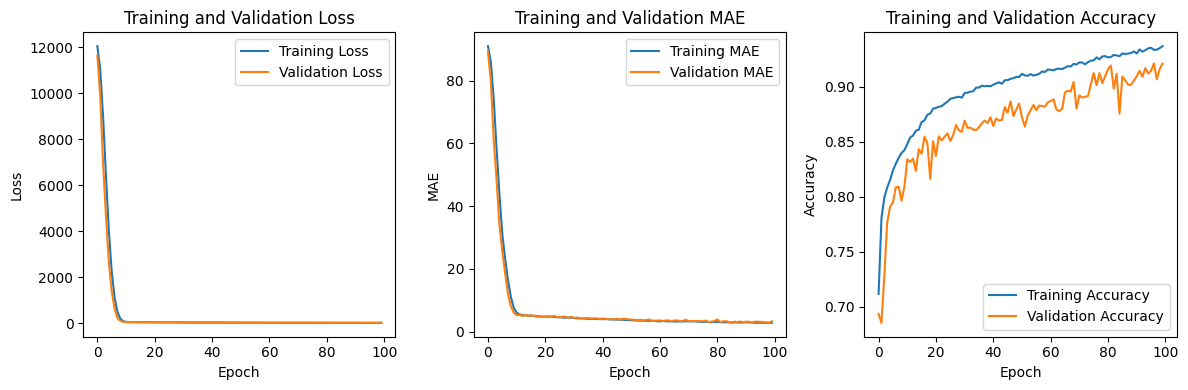

In [58]:
import matplotlib.pyplot as plt

# 損失関数の値をプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# MAEをプロット
plt.subplot(1, 3, 2)
plt.plot(history.history['regression_mae'], label='Training MAE')
plt.plot(history.history['val_regression_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')

# Accuracyをプロット
plt.subplot(1, 3, 3)
plt.plot(history.history['classification_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_classification_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [59]:
# 学習結果の評価
loss, classification_accuracy, regression_mae = model.evaluate(test_dataset)
print(f'Validation loss: {loss}')
print(f'Validation regression MAE: {regression_mae}')
print(f'Validation classification accuracy: {classification_accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.8880 - loss: 30.8282 - regression_mae: 3.7999 
Validation loss: 30.25206756591797
Validation regression MAE: 3.6602723598480225
Validation classification accuracy: 0.8800992965698242
